<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/ALL_NETS_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import time

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
def make_model(n_count):
  inputs = layers.Input(shape = (784,), name = "in_layer")
  x = layers.Flatten()(inputs)
  x = layers.Dense(n_count, activation="relu", name = "hidden_layer")(x)
  outputs = layers.Dense(10, activation="softmax", name = "out_layer")(x)
  model = tf.keras.Model(inputs = inputs, outputs = outputs)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model

In [4]:
neiron_count = [30,1500,5000,10000]
Epochs = [50,10,10,10]
models = []
tests_acc = []
histories = []

for i in range(len(Epochs)):
  print('__________________________________________________')

  new_model = make_model(neiron_count[i])
  print(new_model.summary())

  start_time = time.time()
  myhistory = new_model.fit(X_train, Y_train, batch_size=128, epochs=Epochs[i], validation_split=0.1)
  minutes, seconds = ((time.time() - start_time) - 3600 * ((time.time() - start_time) // 3600)) // 60, (time.time() - start_time) % 60
  print(f"--- {minutes} минут {seconds} секунд ---")

  metrics = myhistory.history
  scores = new_model.evaluate(X_test, Y_test, verbose=0);
  #print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))  
  print('Эпохи: ',Epochs[i], ', accuracy тестовой выборки: %.2f%%' % (scores[1]*100))
  models.append(new_model)
  histories.append(myhistory)

__________________________________________________
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in_layer (InputLayer)       [(None, 784)]             0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer (Dense)        (None, 30)                23550     
                                                                 
 out_layer (Dense)           (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
422/422 [==============================] - 2s 3ms/step - loss: 0.5693 - accuracy: 0.8450 - val_loss: 0.2472 - val_accuracy

In [5]:
models[0].save('model1.h5')
models[1].save('model2.h5')
models[2].save('model3.h5')
models[3].save('model4.h5')

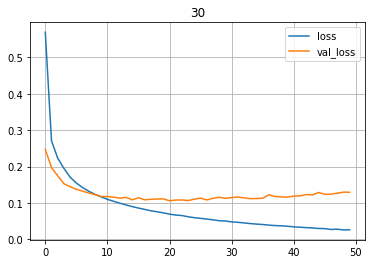

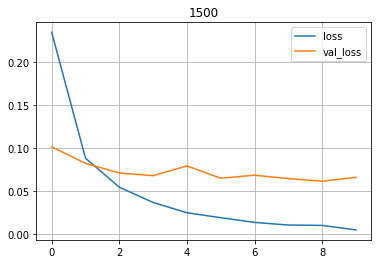

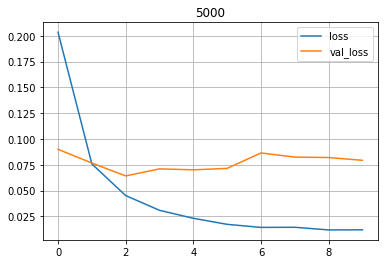

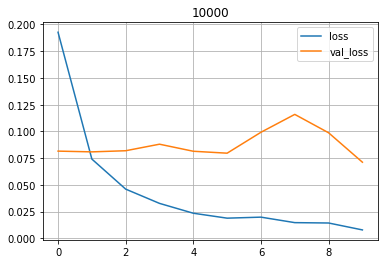

In [6]:
for i in range(4):
  plt.figure()
  plt.plot(histories[i].history['loss'], label='loss')
  plt.plot(histories[i].history['val_loss'], label='val_loss')
  plt.legend()
  plt.grid()
  plt.title(neiron_count[i])